<a href="https://colab.research.google.com/github/amal2334/House-Pricing-Prediction/blob/main/House_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction:**

- In this project, we will predict **house prices** based on features like location, size, and number of rooms. Here’s what we’ll do:

  - **Step 1**: Load and Explore the Data
Understand the dataset and its features.

  - **Step 2**: Clean and Preprocess the Data
Handle missing values, outliers, and encode categorical variables.

  - **Step 3**: Visualize the Data
Use graphs to find patterns and relationships.

  - **Step 4**: Train Regression Models
Build models like Linear Regression, Decision Trees, and Random Forest.

  - **Step 5**: Evaluate the Models
Check performance using metrics like MAE, RMSE, and R².

  - **Step 6**: Interpret Results
Analyze which features impact house prices the most.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')



In [ ]:
data=pd.read_csv('BostonHousing.csv')
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

- crim: Per capita crime rate by town. This column represents the crime rate per person in each town.

- zn: Proportion of residential land zoned for lots over 25,000 sq.ft. This indicates the percentage of land in the town that is zoned for large residential lots.

- indus: Proportion of non-retail business acres per town. This column shows the percentage of land in the town used for non-retail businesses.

- chas: Charles River dummy variable. This is a binary variable where 1 indicates that the tract bounds the Charles River, and 0 indicates that it does not.

- nox: Nitrogen oxides concentration (parts per 10 million). This column measures the concentration of nitrogen oxides in the air, which is a measure of air pollution.

- rm: Average number of rooms per dwelling. This represents the average number of rooms in houses in the town.

- age: Proportion of owner-occupied units built prior to 1940. This column shows the percentage of homes in the town that were built before 1940.
- dis: Weighted mean of distances to five Boston employment centers. This measures the average distance from the town to employment centers in Boston, weighted by the number of jobs in each center.

- rad: Index of accessibility to radial highways. This column indicates how accessible the town is to radial highways, with higher values indicating better accessibility.
- tax: Full-value property-tax rate per 10000
- ptratio: Pupil-teacher ratio by town. This column shows the ratio of students to teachers in the town's schools.

- b: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town. This is a transformation of the proportion of black residents in the town.

- Lstat: Lower status of the population (percent). This column represents the percentage of the population in the town that is considered lower status.

- medv: Median value of owner-occupied homes in $1000s. This is the target variable, representing the median value of owner-occupied homes in thousands of dollars.


In [ ]:
data.shape

(506, 14)

In [ ]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# **Note:**
- this describe table shows the satistical mesures for each numerical column in the dataset  , like :

  - **count**:It helps you identify if there are any missing values in your dataset. If the count is less than the total number of rows, it indicates missing data that you might need to handle.for expample all columns have 506 rows while **rm Column has 501 rows**.

  - **Mean** : The mean gives you a central tendency of the data, which is useful for understanding the typical value in the dataset. However, it can be affected by outliers.for example **crim has a mean of 3.61** ,on the other hand **tax has mean of 408.23**.

  - **std**:Standard deviation tells you how spread out the values are around the mean. A low standard deviation means the values are close to the mean, while a high standard deviation means they are spread out. This helps in understanding the variability in your data.for example** chas has a std of 0.25** ,while **tax has std of 168.53**.

  - **min**:The minimum value helps you understand the lower bound of your data. It can also help in identifying potential errors or outliers if the minimum value is unexpectedly low. so as you can now see , **Zn has  min of 0 **but **rm has a min of 3.56**.

  - **max**:The maximum value helps you understand the upper bound of your data. Like the minimum, it can also help in identifying potential errors or outliers if the maximum value is unexpectedly high.for example **crim has max of 88.97** while **nox has 0.87 **as maximum value .

  - The **25%, 50%, and 75%**values in the describe() method are percentiles, which help you understand the distribution of your data.


In [ ]:
data.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
data.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


# Handeling missing values

In [ ]:
data.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,5
age,0
dis,0
rad,0
tax,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
# we have to fill the missing values  with mean
data['rm'].fillna(data['rm'].mean(),inplace=True)


In [ ]:
data.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


# Note:
- Because all the columns are numerical values ,we are going to skip the part of dataEncoding , but incase we have some categorical value ,we have  to encode them.

# **Data Visulization**:


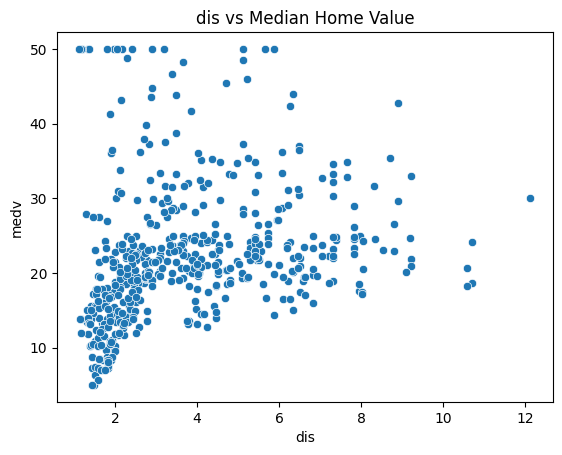

In [ ]:
sn.scatterplot(data=data,x='dis',y='medv')
plt.title('dis vs Median Home Value')
plt.ylabel('medv')
plt.xlabel('dis')
plt.show()

# **Interpretation:**
- as you can see from this **scatter plot** that shows:
  - a **weak  relationship** between **distance** from the town to the employment center in Boston and the **house prices**.
  -  based on the scatter polot, when the distance increases ,the price increses as well.
  - However ,this **counterintuitive**, as we might expect houses farther from the employment centers to be cheaper .
  - This simply indicates that other **factors are influencing the price more than distance**
  -**Correlation does not imply causation** , so we can not assume that distance directly causes price changes.
  - **Outliers** or other variables might be affecting.
  

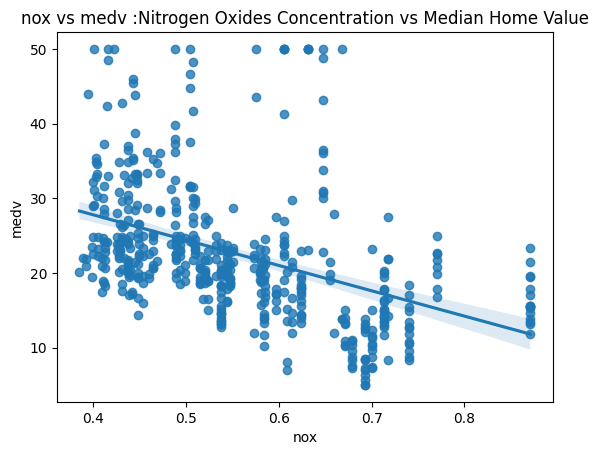

In [ ]:
sn.regplot(data=data,x='nox',y='medv')
plt.title('nox vs medv :Nitrogen Oxides Concentration vs Median Home Value')
plt.ylabel('medv')
plt.xlabel('nox')
plt.show()

# **Interpretation:**
- the regression plot reveals a **moderate to weak negative correlation** between**nitrogen oxides concentration and median home value**'House prices'.
- when the concentration of nitrogen**increases**,the median home value  tends to **decrease**.
- the relationship between **isn't perfectly linear** ,meaning that  **other factors** likely **influence** house values besides NOX levels .
- there are some datapoints that deviate from the general trend , they are **outliers** , for example some areas have a high prices but still high nitrogen oxides concentartion.
-  the datapoints appear to be **more concentrated**in the lower range (aroud 0.4 to 0.6 ) and higher medv range(around 20 to 30) .
- the  **blue line** represent the **linear regresion** line fitted to the data ,the shaded area aroud the line represents the **confidence interval** , indicating the uncertainty in the line's fit.

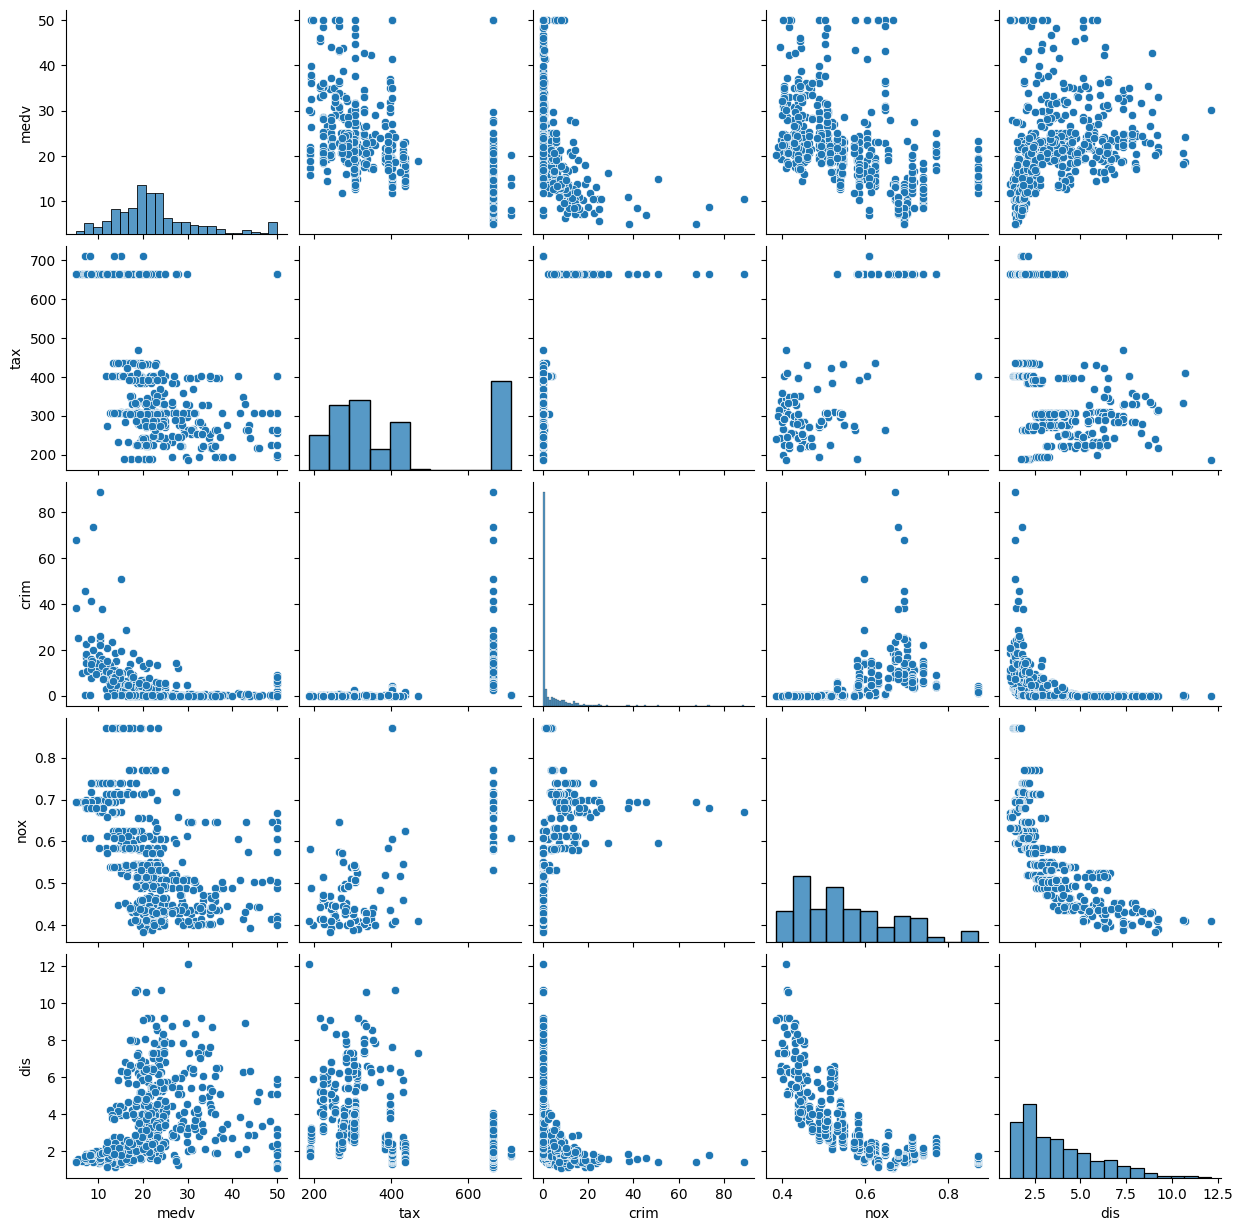

In [ ]:
# Pair plot for selected features and target
sn.pairplot(data[['medv', 'tax', 'crim', 'nox', 'dis']])
plt.show()

# **Interpretation:**
- The pairplot is **matrix of scatters plots** (and histograms on the diagonal ) .
-it helps to visualize the relationship between multiples varibles .

- **Histograms(diagonal) :**
     - ***medv***: the histogram shows the distribution of the house prices , it appears to be somewhat **skewed to the right** , indicating  that there are more lower-priced homes that higher-prices ones .

     -***crime***: the crime rate distribution is heavily **skewed to the right** ,meaning most towns have lower crime rates ,but few have significantly higher rates.

- **Scatter plots (off-Diaagonal):**
    - **med vs Dis**: there seem to be a **positive correlation** ,greater distances to employment centers are associated with higher median home values, this suggests thta people are willing to pay more for homes further fronm the city center .

    - **Tax vs nox** :there is a clear **positive correlation** ,towns with higher tax rates tend to have higher Nox Concentrations.

    - **Crime with Nox** : there is a **noticeable positive correlation** . Towns with higher crime rates tends to have higher NOX concentration.

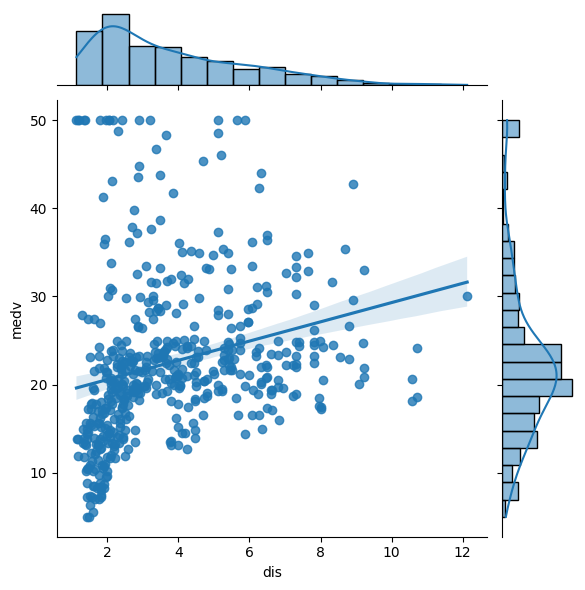

In [ ]:
# Joint plot for 'dis' vs 'medv'
sn.jointplot(x='dis', y='medv', data=data, kind='reg')
plt.show()

# **Interpretation**:
- this is a **joinplot** that shows the relationship between two variables **dis  and medv** ,so we say say they have a **weak positive correlation**.
- in other words when the distance to employment centers**increases** the median value of homes**tends to slightly increase** as well .but the**relationship isn't very strong** .
- the blue line represents the **best fit linear relationship** between dis and medv .
- the **confidence interval** which is the shaded area aroud the regression line that shows the uncertainity around the line .
- **the distibution of dis** : the histograms at the top which is skewed to the right that simply mean ,that they are more areas with smaller distances to employment centers and fewer with larger distances .
- **the distribution of medv** :the right histogram that is approximately normal but with a slight right skew , this suggests that there are more areas with median home values in th elower to middle range ,and fewer areas with a very high median home vales.

- we can as well visualize some **outliers** that are far from the general trend ,they might be worth investigation ,to see ,if they are arrors in the data or represent uniaue areas



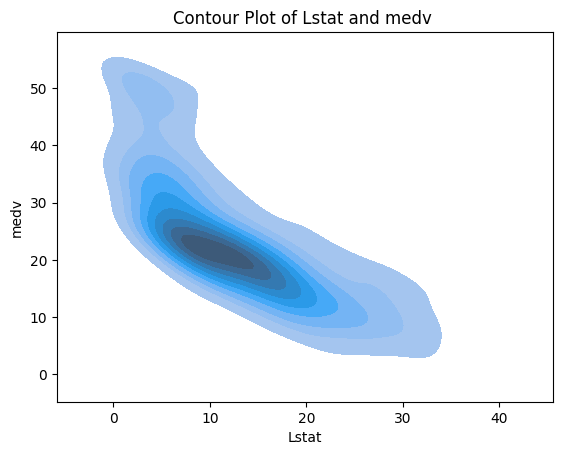

In [ ]:
sn.kdeplot(x=data['lstat'],y=data['medv'],fill=True)
plt.xlabel('Lstat')
plt.ylabel('medv')
plt.title('Contour Plot of Lstat and medv ')
plt.show()

# **Interpretation:**

- the**countour** plot shows the ralationship between**Lstat and medv**
- the plot clearly shows a **strong negative correlation** between Lstat and medv ,as the percentage of population increases , the median value of homes tends to decrease.
- the **darkest area** in the plot reprents the region where most of the data points are concentrated ,the darket area is located where lstat is low and medv is high which confirms the negative correlation.
- **high home values** tend to occur in the areas with **lower percentage** of status population

In [ ]:
# 3D scatter plot for 'nox', 'dis', and 'medv'
import plotly.express as px
fig = px.scatter_3d(data, x='nox', y='dis', z='medv', title='3D Scatter Plot: NOX vs DIS vs MEDV')
fig.show()

# **Interpretation:**
- the**x-axis** represents the nitogen oxides concentration
- the **y-axis** represents the weighted distances to five boston employment centers
- the **z-axix** represents  the median value of homes in 1000 dollars
- **nox vs medv** : as nox increases ,the medv tends to decrease , this suggests a **negative correlation** between notrogin oxides concentration and median home values
- **dis vs medv** : as dis increases ,the med tends to slightly increase ,this suggests a **weak positive correlation** between distance  an median home values
-**nox vs dis** : it appears to be a **negative correlation** between nox and dis , as distance increases ,nox tends to decrease

- **in summary** when the distance increases , the nox decreases and medv increases , and when the nox increases , the distance decreases ,and the medv decreases.


In [ ]:
# Parallel coordinates plot
fig = px.parallel_coordinates(data, dimensions=['medv', 'tax', 'crim', 'nox', 'dis'],
                             color='medv', title='Parallel Coordinates Plot')
fig.show()

# **Interpretation:**
-**Parrarel axes**: each vertical axis represents a feature (medv ,crim ,nox ,dis )
- each **line** represents a datapoint connecting its values across all features
- **color (medv)** :lines are colores based on the medv value.
- **medv vs tax** : we can see a **strong negative correlation** ,lines with high medv values (yellow / light orange ) tend to have low tax values.
- **medv vs crime** : we observe a **strong negative correlation** ,lines with high medv values tend to have low crime values.
- **med vs nox** : we see a **negative correlation** ,but it is not strong ,lines with high medv values tends ro have lower nox values.
- **med vs dis** : the relationship appears to be **weak positive correlation** , lines with high values tend to have slightly higher distnace to the employment centers




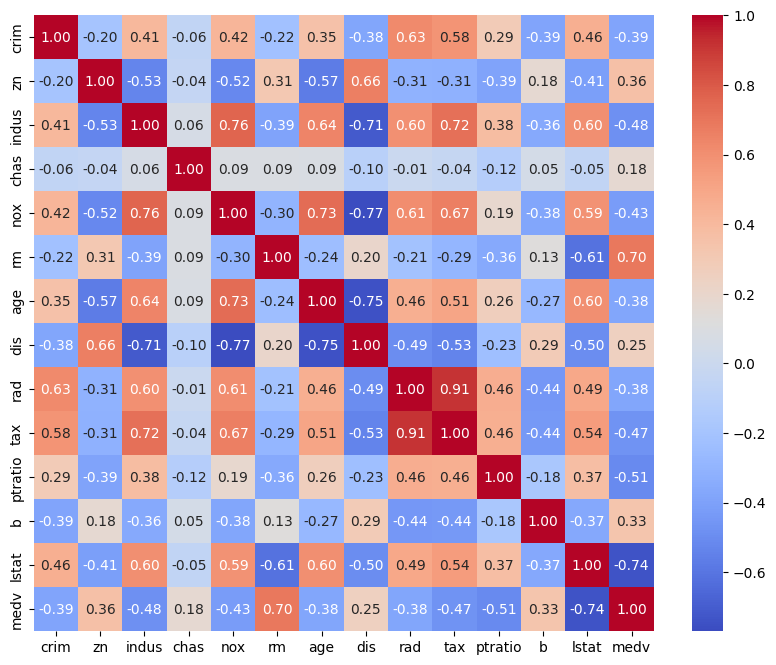

In [ ]:
corr=data.corr()
plt.figure(figsize=(10, 8))
sn.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

# **Interpretation:**
- the **correlation heatmap** provides a valuable overview of relationhsip between the **features and the target varibale**.

- **Strong Positive correlation with the target 'medv'**:
    - rm (the average number of rooms) an medv: a strong postive
     correlation with 0.70 coefficent ,means areas with more rooms per dwelling tend to have higher median home values

- **Strong Negative correltion with medv** :
   - Lstat : a strong negative correlation with  -0.74 coefficient , this means areas with higher percentage of lower status population tend to have lower median home values


- **Moderate Correlation:**
  - Tax : shows a moderate negative correlation with -0.47 ,areas with higher taxex tend to have lower median home values

  - ptratio: pupil teacher ratio by town : shows a moderate negative correlatioj with -0.51 coefficient ,areas with higher pupil-tacher ratio tend to have lower median home values


- **Weak correlation with medv**:
  - age: shows a weak negative correlation with a coefficient of -0.38
  - dis : shows a weak positive correlatioj with a coefficient of 0.25

# **Detecting Outliers :**
- in the EDA ,we have visualize soume outliers ,so now we are going to detect these outliers using some statistical measures:
- we are going to detect outliers in the faeture that have strong correlation with the target medv
- From the heatmap correlation matrix ,Lstat and an rm are strongly correlated with the target .


In [ ]:

# Function to detect outliers using IQR
def detect_outliers_iqr(column):
    Q1 = np.percentile(column, 25)  # First quartile (25th percentile)
    Q3 = np.percentile(column, 75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Detect outliers in 'LSTAT' column
lstat_outliers = detect_outliers_iqr(data['lstat'])
print("Outliers in LSTAT column:")
print(lstat_outliers)

# Detect outliers in 'RM' column
rm_outliers = detect_outliers_iqr(data['rm'])
print("\nOutliers in RM column:")
print(rm_outliers)

Outliers in LSTAT column:
141    34.41
373    34.77
374    37.97
387    31.99
412    34.37
414    36.98
438    34.02
Name: lstat, dtype: float64

Outliers in RM column:
97     8.069
98     7.820
162    7.802
163    8.375
166    7.929
180    7.765
186    7.831
195    7.875
203    7.853
204    8.034
224    8.266
225    8.725
226    8.040
232    8.337
233    8.247
253    8.259
257    8.704
262    8.398
267    8.297
280    7.820
283    7.923
364    8.780
365    3.561
367    3.863
374    4.138
384    4.368
386    4.652
406    4.138
412    4.628
414    4.519
Name: rm, dtype: float64


# **Interpretation:**
- in order to detect outlier i have used IQR (interquantile range )
- the results indicate that the lstat column (percentage of lower status population) ,the listed values are significantly higher or lower thta the typical range of values .
- the results shows that rm column(average number of rooms per dwelling) , the listed values are significantly higher or lower than the typical rage of values .
- the values around 8 represents homes with a higher that usual number of rooms .
- the values around 3 or 4 represents homes with a mich lower than usuak number of rooms .

In [ ]:
#detecting outlier using zscore
from scipy.stats import zscore
z_scores_lstat = zscore(data['lstat'])
z_scores_rm = zscore(data['rm'])
threshold = 3

lstat_outliers = data['lstat'][(z_scores_lstat > threshold) | (z_scores_lstat < -threshold)]

rm_outliers = data['rm'][(z_scores_rm > threshold) | (z_scores_rm < -threshold)]

# Print results
print("Outliers in LSTAT column (Z-Score):")
print(lstat_outliers)

print("\nOutliers in RM column (Z-Score):")
print(rm_outliers)

Outliers in LSTAT column (Z-Score):
141    34.41
373    34.77
374    37.97
412    34.37
414    36.98
Name: lstat, dtype: float64

Outliers in RM column (Z-Score):
225    8.725
257    8.704
262    8.398
364    8.780
365    3.561
367    3.863
374    4.138
406    4.138
Name: rm, dtype: float64


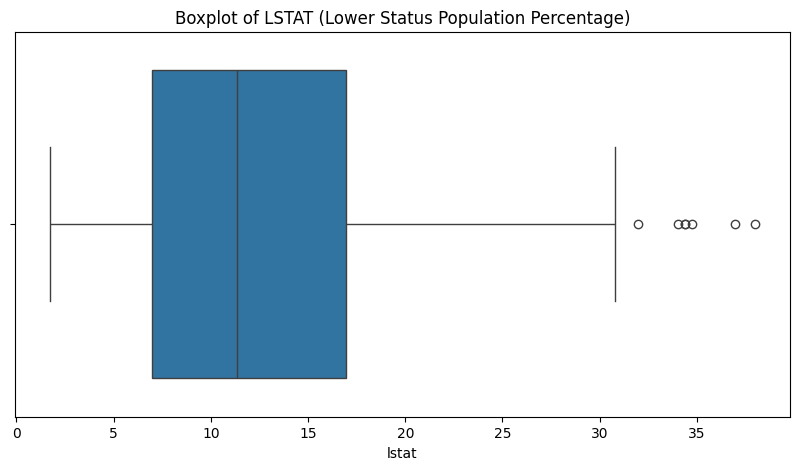

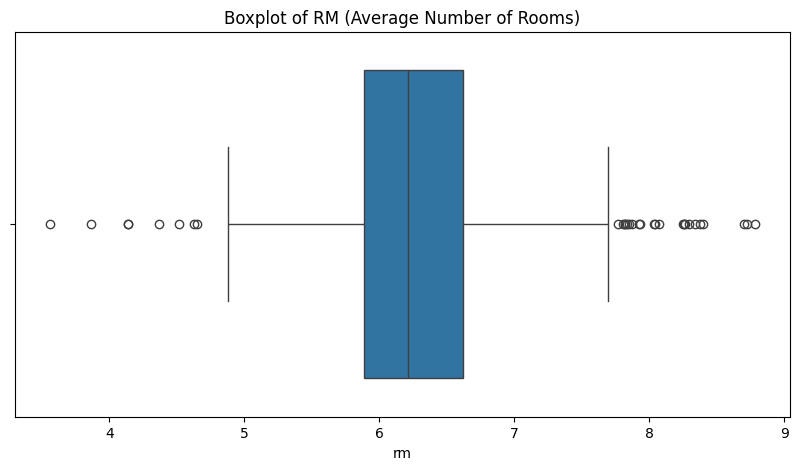

In [ ]:

# Boxplot for 'LSTAT'
plt.figure(figsize=(10, 5))
sn.boxplot(x=data['lstat'])
plt.title("Boxplot of LSTAT (Lower Status Population Percentage)")
plt.show()

# Boxplot for 'RM'
plt.figure(figsize=(10, 5))
sn.boxplot(x=data['rm'])
plt.title("Boxplot of RM (Average Number of Rooms)")
plt.show()

**Note**:
-in order to handlle outliers:
   - we can remove them .
   - we can cap/Floor .
   - we can transform the in case the data is skewed .

- on the other hand i am going to use thta algorithms that are **robust** to outlier such as SVM .

# **Feature Scalling**


In [ ]:
data.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# **Note**:
- Features Scaling is an crucial part before taraining the model so :
- we are going to scale all data except chas because it is binary values , and the target values
  

In [ ]:
#we are goint to scaler these feature susing the standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features_to_scale=['crim','zn','indus','nox','rm','age','rad','tax','ptratio','b','lstat']
scaler=StandardScaler()
data[features_to_scale]=scaler.fit_transform(data[features_to_scale])


In [ ]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,-0.419782,0.284830,-1.287909,0,-0.144217,0.414403,-0.120013,4.0900,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,0,-0.740262,0.194840,0.367166,4.9671,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,0,-0.740262,1.284104,-0.265812,4.9671,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,0,-0.835284,1.017491,-0.809889,6.0622,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,0,-0.835284,1.229926,-0.511180,6.0622,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,0,0.158124,0.440067,0.018673,2.4786,-0.982843,-0.803212,1.176466,0.387217,-0.418147,22.4
502,-0.415249,-0.487722,0.115738,0,0.158124,-0.234308,0.288933,2.2875,-0.982843,-0.803212,1.176466,0.441052,-0.500850,20.6
503,-0.413447,-0.487722,0.115738,0,0.158124,0.986124,0.797449,2.1675,-0.982843,-0.803212,1.176466,0.441052,-0.983048,23.9
504,-0.407764,-0.487722,0.115738,0,0.158124,0.726640,0.736996,2.3889,-0.982843,-0.803212,1.176466,0.403225,-0.865302,22.0


# **Model Training:**
- we are goin to tarin our model with four algorithms and compare between them (evaluation part)

In [ ]:
#we are going now to split the dataset into 2 parts
x=data.drop('medv',axis=1)
y=data['medv']


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


**1-Linear Regression**

In [ ]:
#we are going to use linear regression model
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
#evaluate the model
y_pred=lr.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('Mean Squared Error:',mse)
print('Mean Absolute Error:',mae)
print('R2 Score:',r2)



Mean Squared Error: 24.404825188146486
Mean Absolute Error: 3.2064039639003896
R2 Score: 0.6672089705941879


 **2-Random Forest Regressor :**


In [ ]:
#we are going to use random forest regressor to tain the model
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
#evaluate the model
y_pred=rf.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('Mean Squared Error:',mse)
print('Mean Absolute Error:',mae)
print('R2 Score:',r2)

Mean Squared Error: 7.942327176470583
Mean Absolute Error: 2.1170980392156866
R2 Score: 0.8916962028386426


**3-Support vector machine**

In [ ]:
#we are going to use support vector machine to tarin our data
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [ ]:
#evaluate the model
y_pred=svr.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('Mean Squared Error:',mse)
print('Mean Absolute Error:',mae)
print('R2 Score:',r2)


Mean Squared Error: 24.82339712084995
Mean Absolute Error: 2.839374435624024
R2 Score: 0.6615012065233179


**4-Xgboost Regressor**

In [ ]:
#we are going to use Xgboost to train the model
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
#evaluate the model
y_pred=xgb.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('Mean Squared Error:',mse)
print('Mean Absolute Error:',mae)
print('R2 Score:',r2)


Mean Squared Error: 7.217769116634085
Mean Absolute Error: 1.958836310517554
R2 Score: 0.9015764794125712


In [ ]:
# Example results for each algorithm
results = {
    'Linear Regression': {'MSE': 24.40, 'MAE': 3.20, 'R2': 0.667},
    'Random Forest': {'MSE': 7.94, 'MAE': 2.18, 'R2': 0.89},
    'SVM': {'MSE': 24.82, 'MAE': 2.83, 'R2': 0.661},
    'XGBoost': {'MSE': 7.21, 'MAE': 1.95, 'R2': 0.90}
}



results_df = pd.DataFrame(results).T  # Transpose to have algorithms as rows
print("Comparison of Algorithms:")
print(results_df)

Comparison of Algorithms:
                     MSE   MAE     R2
Linear Regression  24.40  3.20  0.667
Random Forest       7.94  2.18  0.890
SVM                24.82  2.83  0.661
XGBoost             7.21  1.95  0.900


# **Note**
- Xgboost is the **clear winner** in terms of prediction accuracy and explanatory powe , it has the **lowest error** rates and the **highest R2 value**.
- Random Forest **performs very well** , closely following XGboost in performance.
- Linear Regrssion and SVM show **moderate performance**  ,with higher error rates  and lower R2 values , their performance is quite similar.


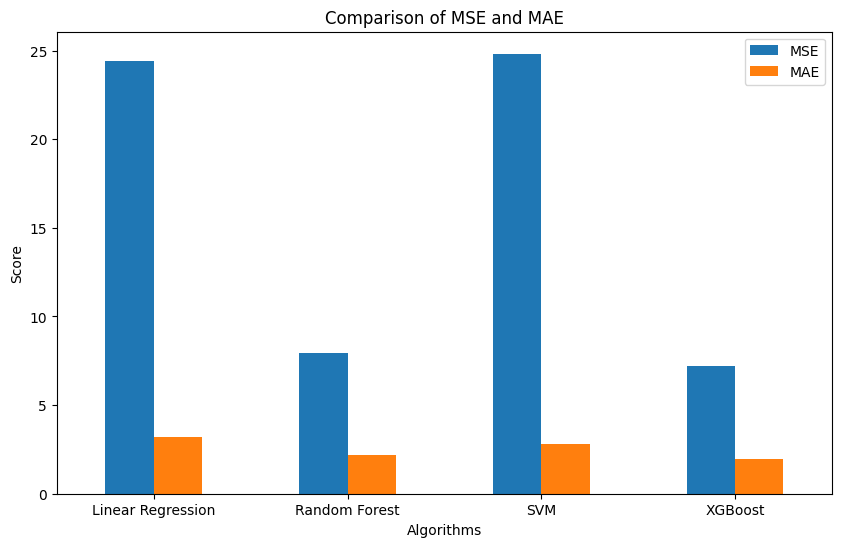

In [ ]:


# Plot MSE and MAE
results_df[['MSE', 'MAE']].plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of MSE and MAE')
plt.xlabel('Algorithms')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

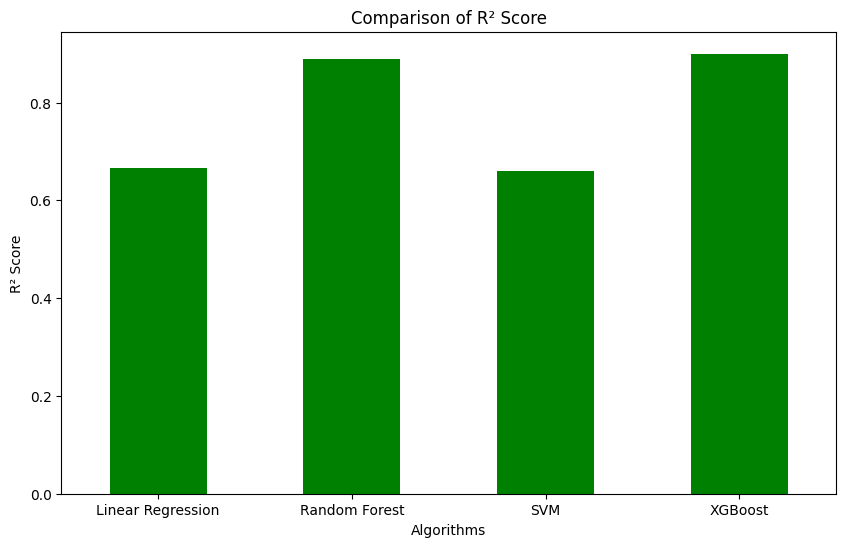

In [ ]:
# Plot R² Score
results_df['R2'].plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Comparison of R² Score')
plt.xlabel('Algorithms')
plt.ylabel('R² Score')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Find the best algorithm based on MSE, MAE, and R²
best_mse = results_df['MSE'].idxmin()
best_mae = results_df['MAE'].idxmin()
best_r2 = results_df['R2'].idxmax()

print(f"Best Algorithm based on MSE: {best_mse}")
print(f"Best Algorithm based on MAE: {best_mae}")
print(f"Best Algorithm based on R²: {best_r2}")

Best Algorithm based on MSE: XGBoost
Best Algorithm based on MAE: XGBoost
Best Algorithm based on R²: XGBoost


In [ ]:
# Rank algorithms by MSE (ascending)
mse_rank = results_df['MSE'].sort_values().index.tolist()

# Rank algorithms by MAE (ascending)
mae_rank = results_df['MAE'].sort_values().index.tolist()

# Rank algorithms by R² (descending)
r2_rank = results_df['R2'].sort_values(ascending=False).index.tolist()

print("Ranking by MSE:", mse_rank)
print("Ranking by MAE:", mae_rank)
print("Ranking by R²:", r2_rank)

Ranking by MSE: ['XGBoost', 'Random Forest', 'Linear Regression', 'SVM']
Ranking by MAE: ['XGBoost', 'Random Forest', 'SVM', 'Linear Regression']
Ranking by R²: ['XGBoost', 'Random Forest', 'Linear Regression', 'SVM']


# **Note:**
- In order to improve the model's performance we can do
   - Hyperparamter Tunning
   - Cross Validation